<a href="https://colab.research.google.com/github/Evely90/CO2-Emissions/blob/main/Future_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-fossil fuel energy with best price in the future
In this notebook, the following question will be analyzed:

**Which non-fossil fuel energy technology will have the best price in the future?**

To answer this question, a dataset is used that has the worldwide levelized cost of energy for each technology.
The levelized cost is the cost per unit of energy generated across the lifetime of a new power plant. The data in the dataset is shown in US dollars per KWh. It is adjusted for inflation *(International Renewable Energy Agency (2023) via [Our World in Data](https://ourworldindata.org/grapher/levelized-cost-of-energy?tab=table)).*


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import seaborn as sns

# Import dataframe of levelized energy costs
df = pd.read_csv('https://raw.githubusercontent.com/Evely90/Co2-Emissions/main/levelized-cost-of-energy.csv')
df

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Argentina,ARG,2012,NaN,NaN,NaN,NaN,NaN,NaN,0.117167
1,Argentina,ARG,2013,NaN,NaN,NaN,NaN,NaN,NaN,0.118271
2,Argentina,ARG,2014,NaN,NaN,NaN,NaN,NaN,NaN,0.103164
3,Argentina,ARG,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.098663
4,Argentina,ARG,2017,NaN,NaN,NaN,NaN,NaN,NaN,0.103911
...,...,...,...,...,...,...,...,...,...,...
704,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.219476
705,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.196082
706,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.171793
707,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.160972


In [37]:
# Creating a copy before continueing so the original dataframe stays unaltered.
df = df.copy()

In [38]:
# Filter the df to only use World costs, since there isn't many data for each country
df = df.loc[df['Entity'] == 'World']

# Drop unncessecary columns
df = df.drop(columns=['Code', 'Entity'])

# Rename columns
df.columns = [col.replace(' levelized cost of energy', '') for col in df.columns]

# Reset the index
df.reset_index(drop=True, inplace=True)
df

,Year,Bioenergy,Geothermal,Offshore wind,Solar photovoltaic,Concentrated solar power,Hydropower,Onshore wind
0,2010,0.082115,0.052968,0.197266,0.445,0.380490,0.041607,0.107237
1,2011,0.078753,NaN,0.206095,0.332,0.368422,0.039122,0.101918
2,2012,0.067661,0.088407,0.174729,0.248,0.357044,0.040702,0.093280
3,2013,0.086412,0.064723,0.148688,0.191,0.282368,0.045491,0.093891
4,2014,0.086581,0.066333,0.181632,0.172,0.247807,0.045431,0.084304
5,2015,0.076327,0.061978,0.148289,0.129,0.238052,0.039134,0.072628
6,2016,0.074623,0.071487,0.122831,0.113,0.280949,0.051779,0.067264
7,2017,0.074508,0.074787,0.112199,0.089,0.268972,0.054275,0.063133
8,2018,0.057697,0.068872,0.105692,0.075,0.158322,0.042627,0.053577
9,2019,0.067484,0.071406,0.091183,0.066,0.233778,0.044309,0.046940


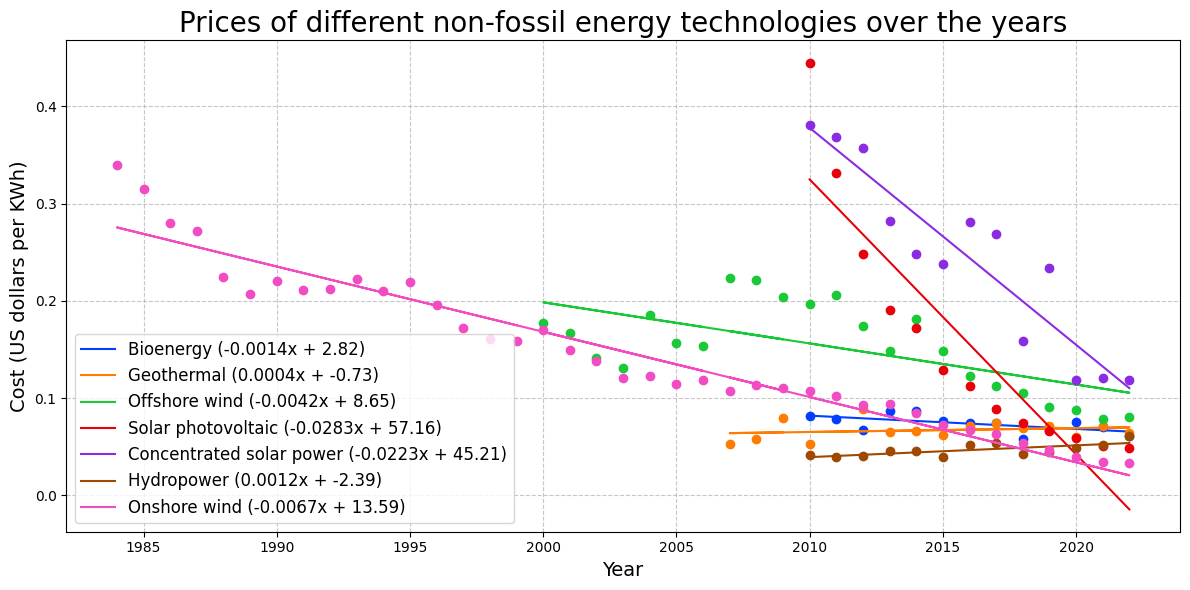

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

# Set colors of points and regression line
point_colors = sns.color_palette('bright')
line_colors = sns.color_palette('bright')

# Iterate over each column (energy technology)
for j, energy_tech in enumerate(df.columns[1:]):
    # Pick the years without missing NaN prices for each energy technology
    df_nonan = df.dropna(subset=[energy_tech])
    years = df_nonan['Year']
    energy_price = df_nonan[energy_tech]

    # Add linear regression for each energy technology
    try:
        coefs = np.polyfit(years, energy_price, 1)
        poly_line = np.poly1d(coefs)
        legend_label = f'{energy_tech} ({coefs[0]:.4f}x + {coefs[1]:.2f})'
        plt.plot(years, poly_line(years), label=legend_label, color=line_colors[j])
    except ValueError as error:
        print(f"Could not plot linear regression line for {energy_tech} because: {error}")

    # Create scatterplot for each energy technology
    plt.scatter(years, energy_price, alpha=1, zorder=2, color=point_colors[j])

# Add labels, title, and legend
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cost (US dollars per KWh)', fontsize=14)
plt.title('Prices of different non-fossil energy technologies over the years', fontsize=20)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()


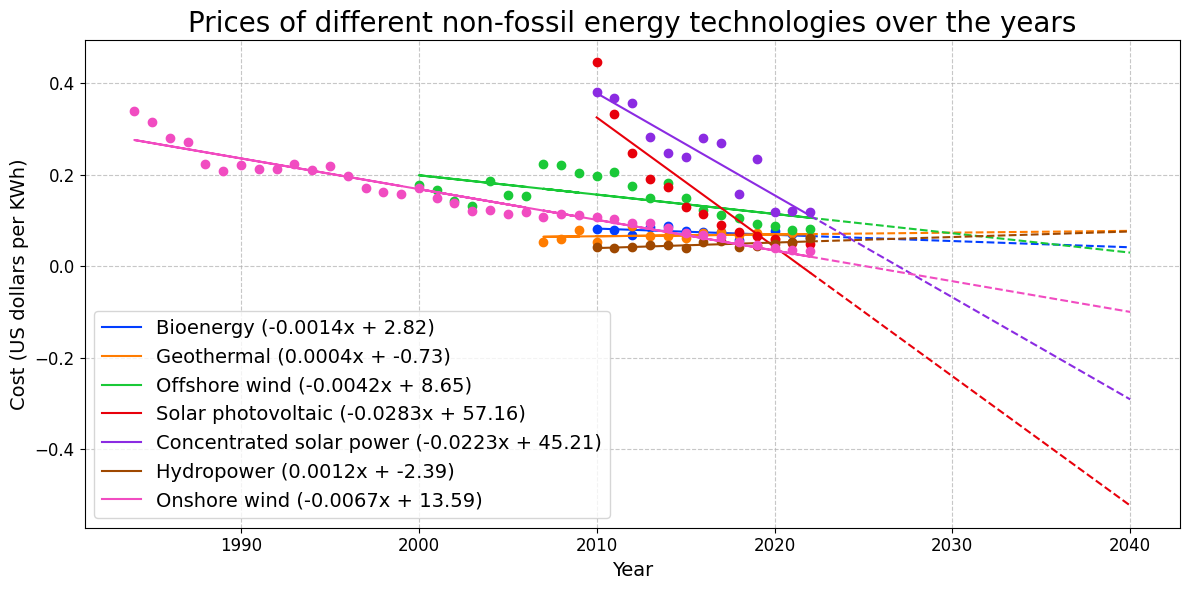

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

# Set colors of points and regression line
point_colors = sns.color_palette('bright')
line_colors = sns.color_palette('bright')

# Iterate over each column (energy technology)
for j, energy_tech in enumerate(df.columns[1:]):
    # Pick the years without missing NaN prices for each energy technology
    df_nonan = df.dropna(subset=[energy_tech])
    years = df_nonan['Year']
    energy_price = df_nonan[energy_tech]

    # Add linear regression for each energy technology
    try:
        coefs = np.polyfit(years, energy_price, 1)
        poly_line = np.poly1d(coefs)
        legend_label = f'{energy_tech} ({coefs[0]:.4f}x + {coefs[1]:.2f})'
        plt.plot(years, poly_line(years), label=legend_label, color=line_colors[j])

        # Extend linear regression to future years for each energy technology
        future_years = np.arange(2022, 2041)
        future_energy_price = poly_line(future_years)
        plt.plot(future_years, future_energy_price, linestyle='--', color=line_colors[j])
    except ValueError as error:
        print(f"Could not plot linear regression line for {energy_tech} because: {error}")

    # Create scatterplot for each energy technology
    plt.scatter(years, energy_price, alpha=1, zorder=2, color=point_colors[j])

# Add labels, title, and legend
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cost (US dollars per KWh)', fontsize=14)
plt.title('Prices of different non-fossil energy technologies over the years', fontsize=20)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()
plt.show()


## Conclusion
**Bioenergy, geothermal and hydropower:** These energy start with relatively low levalized compared to others, and seem to have relatively stable levelized costs over time, with minor fluctuations expected in the future. While the levelized cost of bioenergy might decrease a bit in the future years, the geothermal and hydropower energy costs may experience a slight increase.

**Onshore and offshore wind:** The levelized cost of onshore and offshore wind energy technologies show a clear downward trend, gradually decreasing over time.

**Concentrated solar power and solar photovoltaic:** Both of the solar power technologies historically had higher levelized costs compared to the other technologies, but have experienced a rapid decrease in costs. However, in recent years, the rate of this decrease has stabilized somewhat. Therefore, a future price prediction must be made with caution.

The extrapolated regression lines suggests that both solar technologies, as well as onshore wind, could potentially reach a negative price in the future, and might thus become economically profitable and have the most promising levelized costs for the future. However, from 2020 to 2022, the levelized costs of all different energy technologies seem to stabilize around the current levels so this is not certain.
